## Revolutionizing Stroke Prediction: Harnessing Machine Learning Algorithms and Data Analytics for Proactive Healthcare 

#### Our top priority in this health problem is to identify patients with a stroke.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

<b>Attribute Information</b>

1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>

### Import libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from plotly.offline import init_notebook_mode
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


import pandas as pd
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

C:\Users\Bindu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
from sklearn.impute import KNNImputer #missing bmi values will be handled

In [9]:
import pandas as pd
from sklearn.impute import KNNImputer

# Create a DataFrame with missing bmi values
data_1 = {
    'age': [25, 30, 35, 40, 45],
    'weight': [70, 80, 75, 85, 90],
    'height': [175, 180, 170, 185, 190],
    'bmi': [22.86, 24.69, None, 24.84, None]
}

df_1 = pd.DataFrame(data_1)
print("Original DataFrame:")
print(df_1)

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the DataFrame
df_imputed = imputer.fit_transform(df_1)
df_imputed = pd.DataFrame(df_imputed, columns=df_1.columns)
print("\nDataFrame after KNN Imputation:")
print(df_imputed)


Original DataFrame:
   age  weight  height    bmi
0   25      70     175  22.86
1   30      80     180  24.69
2   35      75     170    NaN
3   40      85     185  24.84
4   45      90     190    NaN

DataFrame after KNN Imputation:
    age  weight  height     bmi
0  25.0    70.0   175.0  22.860
1  30.0    80.0   180.0  24.690
2  35.0    75.0   170.0  23.775
3  40.0    85.0   185.0  24.840
4  45.0    90.0   190.0  24.765


In [10]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [11]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [13]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

### Exploratory Data Analysis

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

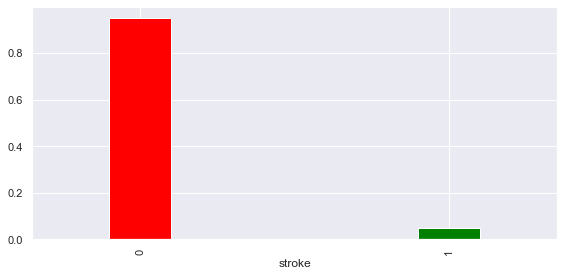

In [14]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red', 'green'), ax=axes)


plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='count'>

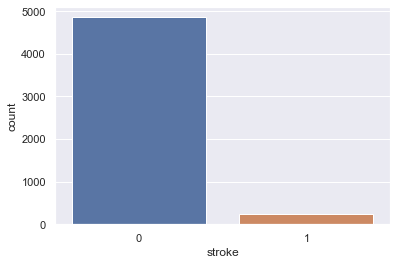

In [15]:
sns.countplot(x='stroke',data=df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

age  hypertension  heart_disease  avg_glucose_level        bmi
0  67.0             0              1             228.69  36.600000
1  61.0             0              0             202.21  28.893237
2  80.0             0              1             105.92  32.500000
3  49.0             0              0             171.23  34.400000
4  79.0             1              0             174.12  24.000000

## Univariate Variable Analysis

* **Categorical Variables:** 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

* **Numerical Variables:** 'id', 'hypertension', 'heart_disease', 'stroke'

### Categorical Variables


In [18]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

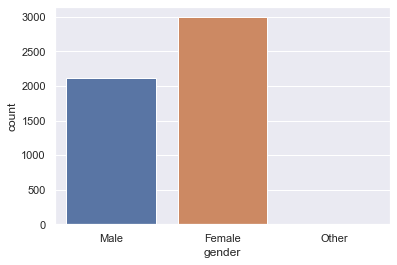

In [19]:
import seaborn as sns
sns.countplot(df['gender'])

In [20]:
def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [21]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)
print(categorical)

print("Categorical variables:")
print(categorical_list)

id                   False
gender                True
age                  False
hypertension         False
heart_disease        False
ever_married          True
work_type             True
Residence_type        True
avg_glucose_level    False
bmi                  False
smoking_status        True
stroke               False
dtype: bool
Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


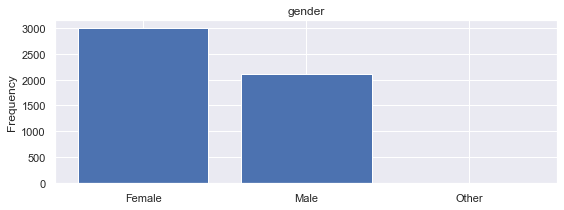

gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


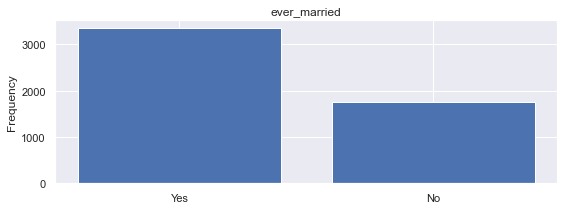

ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


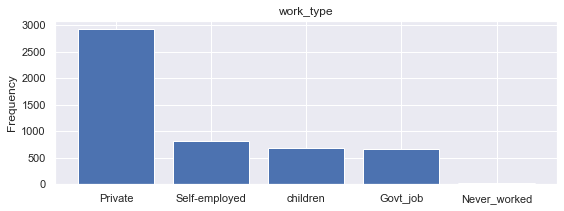

work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


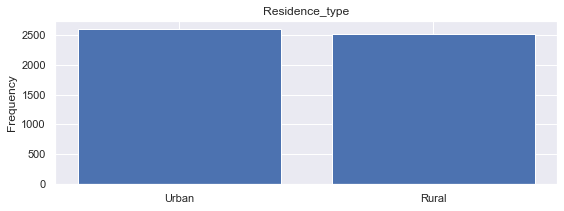

Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


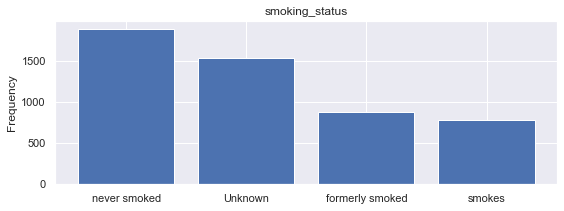

smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [22]:
sns.set_style('darkgrid')
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

# Relation between categorical column and target columns

In [23]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

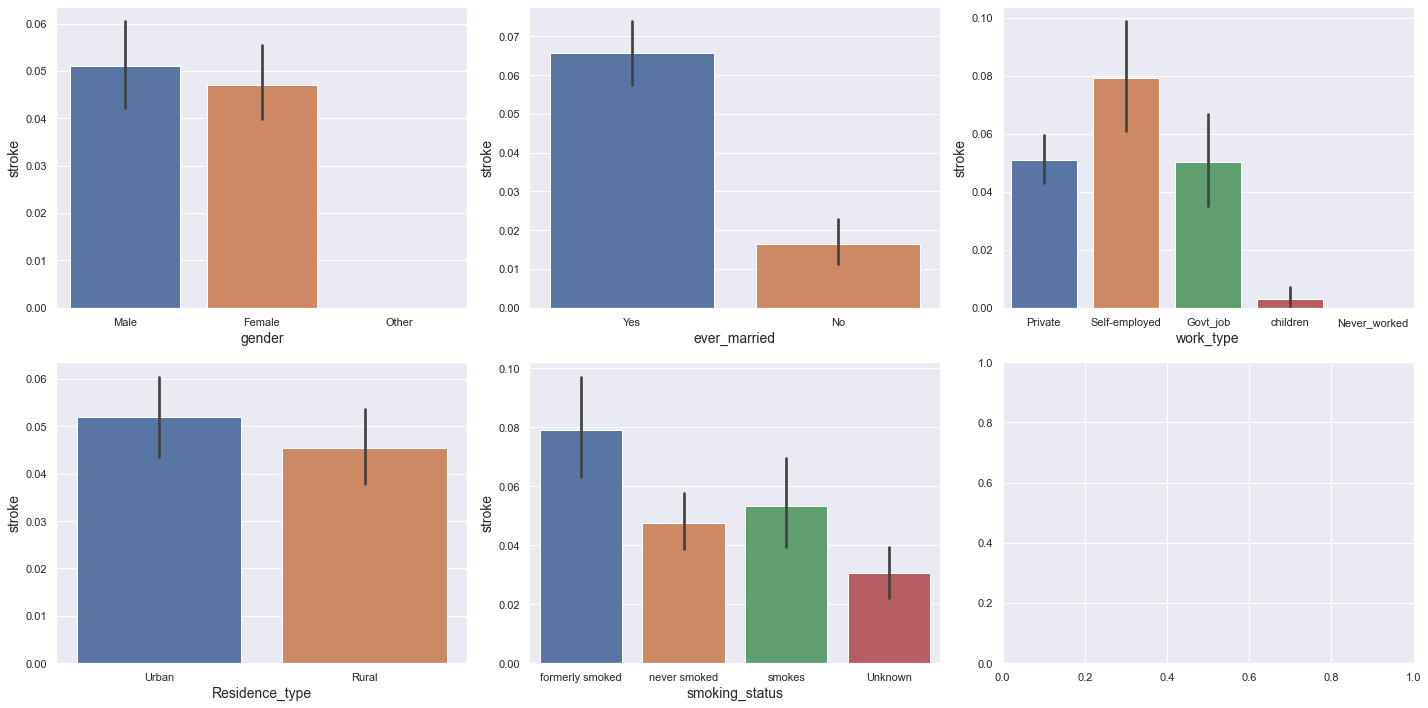

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(df[c], df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

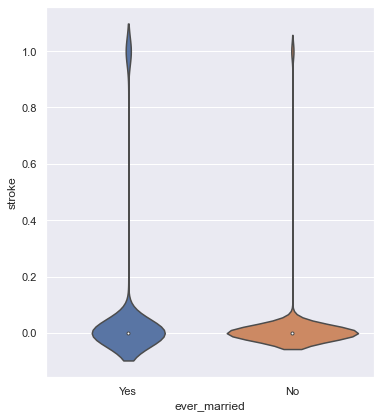

In [25]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)


### Numerical Variables

In [26]:
numerical_int64 = (df.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Numerical variables:")  
print(numerical_int64_list)


Numerical variables:
['id', 'hypertension', 'heart_disease', 'stroke']


In [27]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

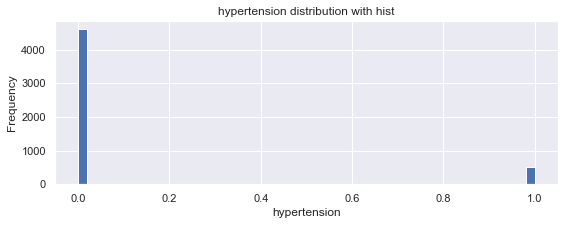

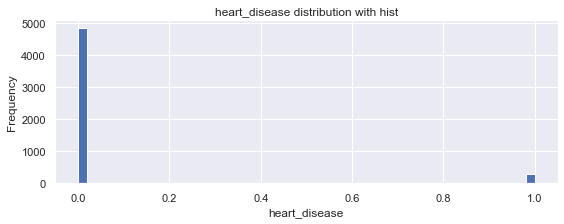

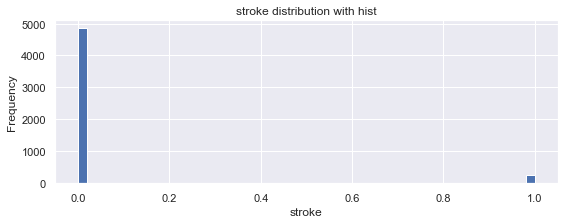

In [28]:
numerical_variables = ['hypertension', 'heart_disease', 'stroke']
for n in numerical_variables:
    plot_hist(n)

In [29]:
numerical_float64 = (df.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


In [30]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

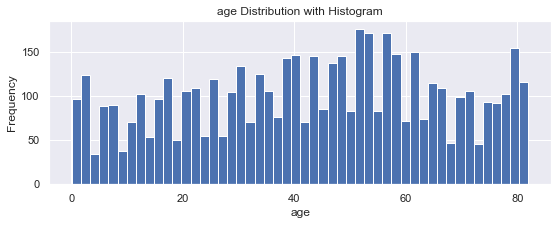

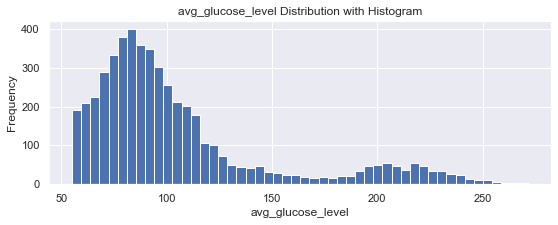

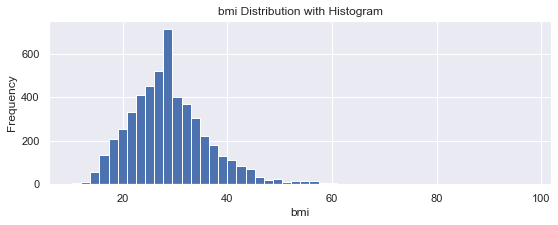

In [31]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

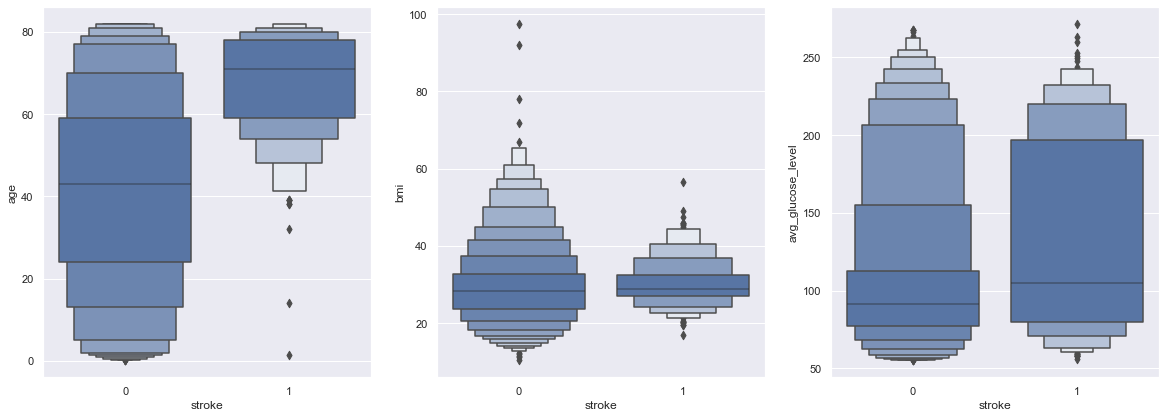

In [32]:
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=df['stroke'], y=df['age'],
              color="b", 
              scale="linear", data=df)

plt.subplot(2,3,2)
sns.boxenplot(x=df['stroke'], y=df['bmi'],
              color="b", 
              scale="linear", data=df)

plt.subplot(2,3,3)
sns.boxenplot(x=df['stroke'], y=df['avg_glucose_level'],
              color="b", 
              scale="linear", data=df)

In [33]:
import plotly.express as px

# Create boxen plots with Plotly Express
fig = px.box(df, x='stroke', y='age', color='stroke', points='all')
fig.update_traces(boxmean='sd')

# Customize the layout
fig.update_layout(title='Boxen Plot of Age by Stroke',
                  xaxis_title='Stroke',
                  yaxis_title='Age')

# Show the interactive plot
fig.show()


# BMI
fig_bmi = px.box(df, x='stroke', y='bmi', color='stroke', points='all')
fig_bmi.update_traces(boxmean='sd')
fig_bmi.update_layout(title='Boxen Plot of BMI by Stroke',
                      xaxis_title='Stroke',
                      yaxis_title='BMI')
fig_bmi.show()

# Avg Glucose Level
fig_glucose = px.box(df, x='stroke', y='avg_glucose_level', color='stroke', points='all')
fig_glucose.update_traces(boxmean='sd')
fig_glucose.update_layout(title='Boxen Plot of Avg Glucose Level by Stroke',
                          xaxis_title='Stroke',
                          yaxis_title='Avg Glucose Level')
fig_glucose.show()



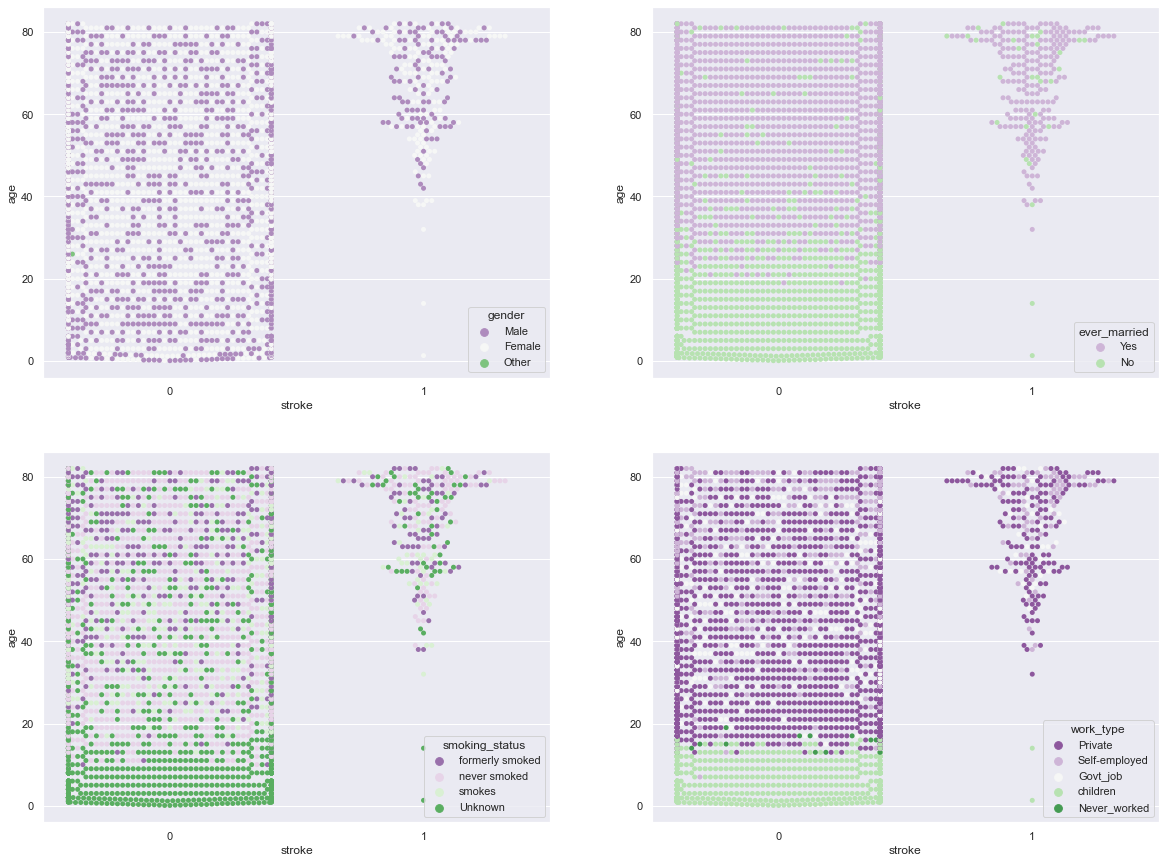

In [36]:
import warnings

# Filter out the specific UserWarning
#warnings.filterwarnings("ignore", message="66.3% of the points cannot be placed")

import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.swarmplot(x="stroke", y="age", hue="gender", data=df, palette="PRGn")

plt.subplot(2, 2, 2)
sns.swarmplot(x="stroke", y="age", hue="ever_married", data=df, palette="PRGn")

plt.subplot(2, 2, 3)
sns.swarmplot(x="stroke", y="age", hue="smoking_status", data=df, palette="PRGn")

plt.subplot(2, 2, 4)
sns.swarmplot(x="stroke", y="age", hue="work_type", data=df, palette="PRGn")

plt.show()


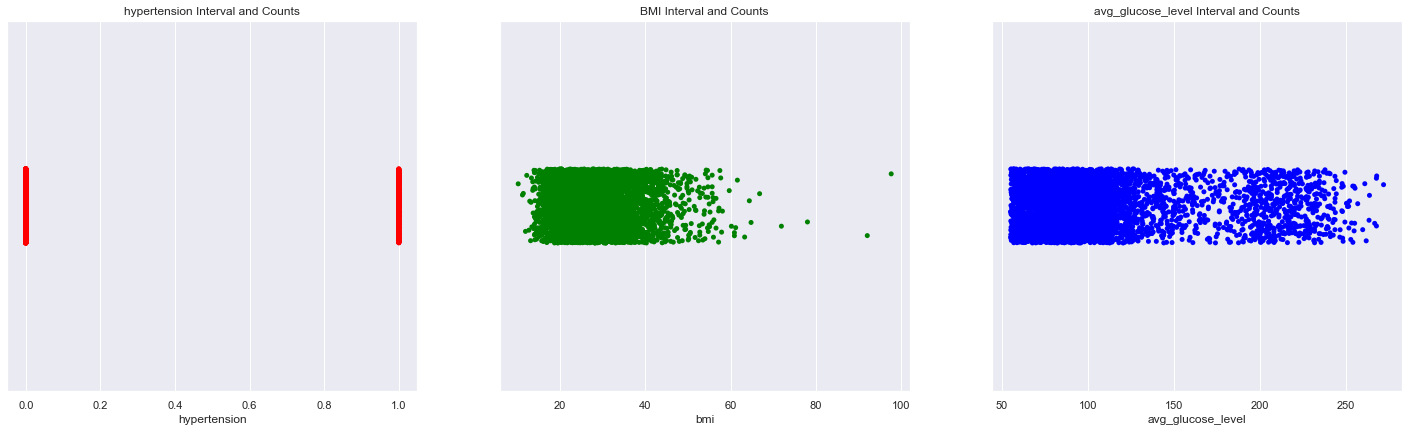

In [35]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 3, 1)
sns.stripplot(data=df, x='hypertension', color='red').set_title('hypertension Interval and Counts')

plt.subplot(2, 3, 2)
sns.stripplot(data=df, x='bmi', color='green').set_title('BMI Interval and Counts')

plt.subplot(2, 3, 3)
sns.stripplot(data=df, x='avg_glucose_level', color='blue').set_title('avg_glucose_level Interval and Counts')

plt.show()


# 2. Basic Data Analysis

## Gender - Stroke

#### Average stroke rate by gender. Male's stroke rate is higher.

In [37]:
df[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

gender    stroke
1    Male  0.051064
0  Female  0.047094
2   Other  0.000000

In [38]:
import plotly.graph_objs as go
from plotly.offline import plot

labels = df['gender'].value_counts().index.tolist()
values = df['gender'].value_counts().values.tolist()

data = go.Pie(labels=labels, values=values)

layout = go.Layout(title="Distribution of Genders")

fig = go.Figure(data=[data], layout=layout)

plot(fig, filename='gender_distribution.html')


'gender_distribution.html'

## Ever Married - Stroke

#### stroke rate based on married or not

In [39]:
df[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

ever_married    stroke
1          Yes  0.065613
0           No  0.016505

Text(0.5, 1.0, "Distribution of Samples by 'ever_married'")

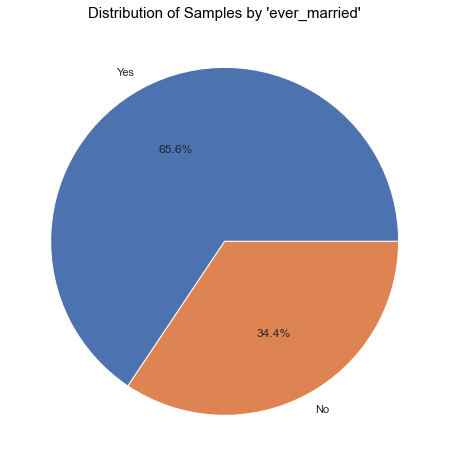

In [40]:
labels = df['ever_married'].value_counts().index
sizes = df['ever_married'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'ever_married'",color = 'black',fontsize = 15)

## Work Type - Stroke

#### stroke rate based on work_type

In [41]:
df[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

work_type    stroke
3  Self-employed  0.079365
2        Private  0.050940
0       Govt_job  0.050228
4       children  0.002911
1   Never_worked  0.000000

In [42]:
df[["work_type","stroke"]].groupby(["work_type"], as_index = False).count().sort_values(by="stroke",ascending = False)

work_type  stroke
2        Private    2925
3  Self-employed     819
4       children     687
0       Govt_job     657
1   Never_worked      22

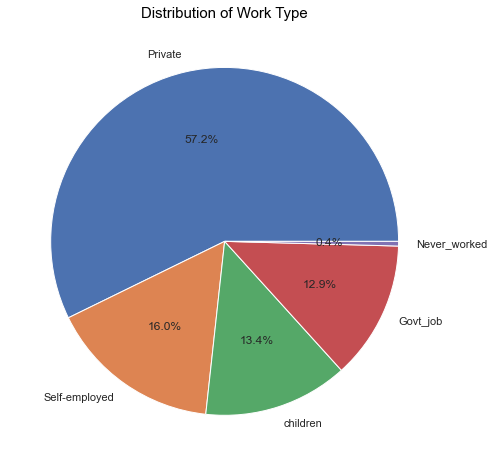

In [43]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt

labels = df['work_type'].value_counts().index.tolist()
sizes = df['work_type'].value_counts().values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)])
fig.update_layout(title="Distribution of Work Type")

# Plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Work Type", color='black', fontsize=15)
plt.show()



## Residence_type - Stroke

#### stroke rate based on residence type.

In [44]:
df[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

Residence_type    stroke
1          Urban  0.052003
0          Rural  0.045346

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


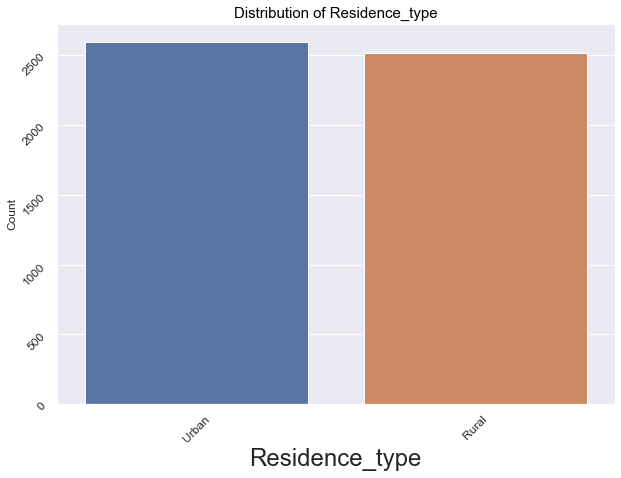

In [45]:
counts = df['Residence_type'].value_counts()
print(counts)
plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values)

plt.ylabel('Count')
plt.xlabel('Residence_type', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of Residence_type',color = 'black',fontsize=15)
plt.show()

## smoking_status - Stroke

In [46]:
df[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

smoking_status    stroke
1  formerly smoked  0.079096
3           smokes  0.053232
2     never smoked  0.047569
0          Unknown  0.030440

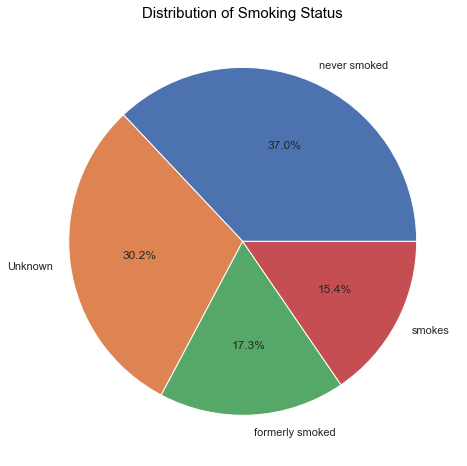

In [47]:
import matplotlib.pyplot as plt

labels = df['smoking_status'].value_counts().index.tolist()
sizes = df['smoking_status'].value_counts().values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Smoking Status", color='black', fontsize=15)
plt.show()


# 3. Pandas Profiling

#### A useful tool for producing in-depth reports about data is YData profiling. It offers perceptions into different statistical facts, distributions, and sorts of data. With features like correlation maps and feature visualizations, this tool helps with data preparation. 

#### For more details, you can refer to the documentation - https://docs.profiling.ydata.ai/latest/

In [48]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 4. Correlation

#### A correlation shows the relationship between one or more variables. These variables may be characteristics of the input data that have been utilized to forecast the target variable.

## https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

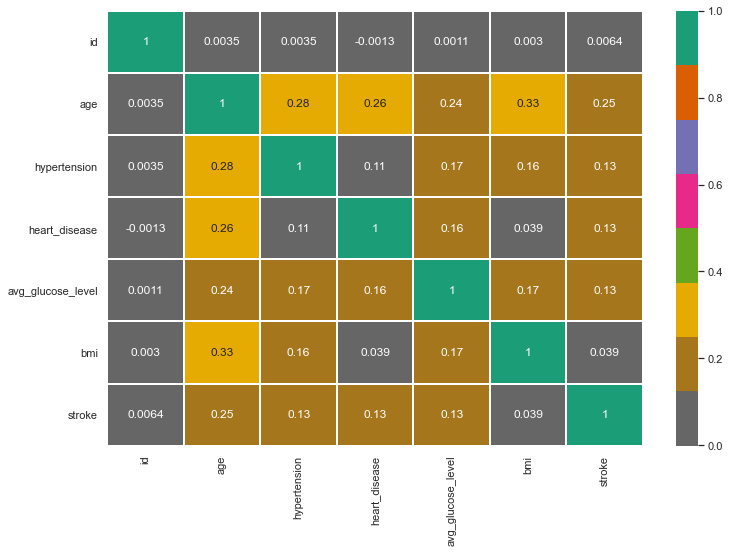

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8)) 
sns.heatmap(numerical_columns.corr(), annot=True, cmap='Dark2_r', linewidths=2)
plt.show()


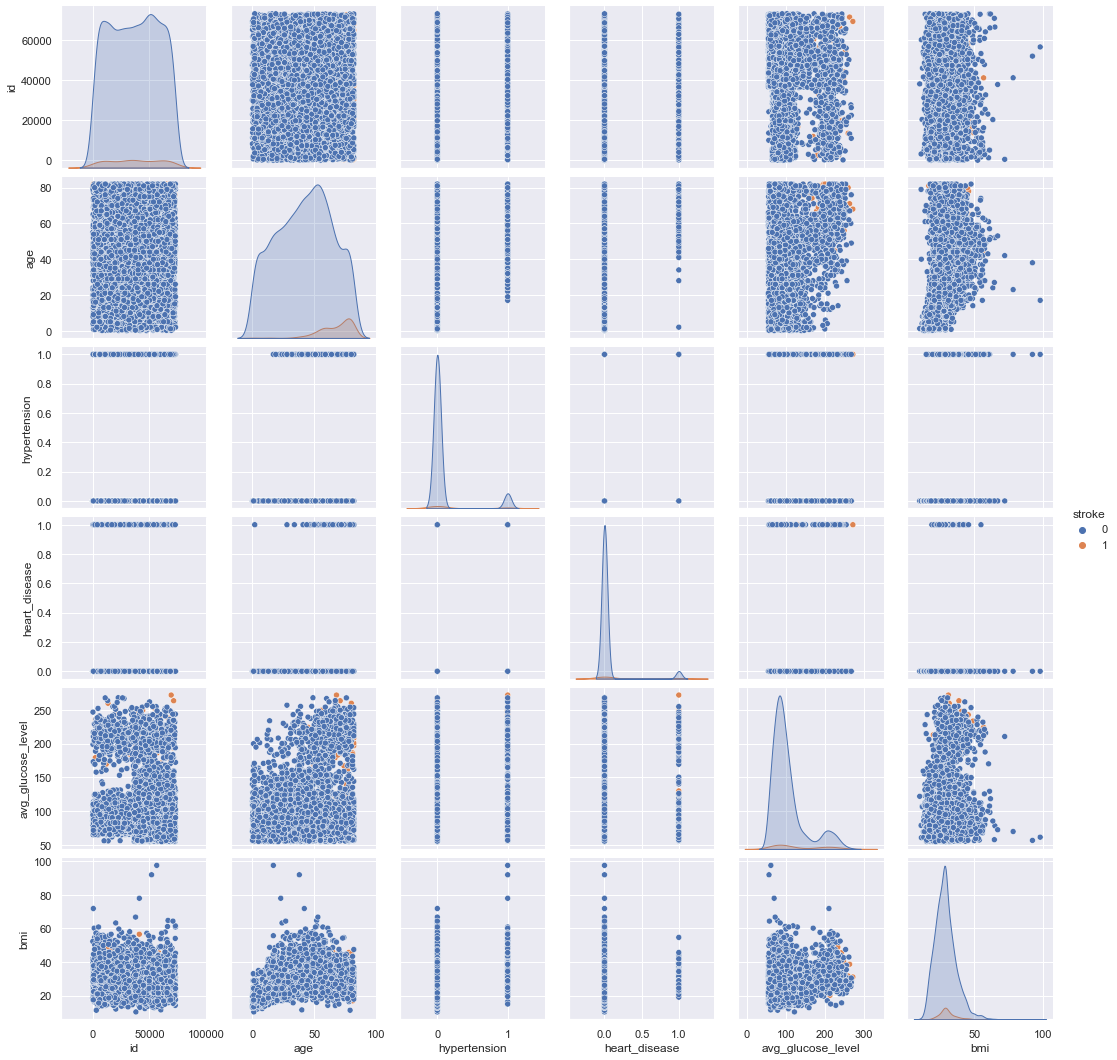

In [50]:
sns.pairplot(df, hue = 'stroke')


# 5. Anomaly Detection

#### An anomaly is defined as an observation that substantially deviates from other observations within the same sample. A pattern for anomaly detection yields two distinct outcomes. The first indicates whether or not the observation is aberrant using a categorical tag, and the second provides a trust value or score. The score provides further context for the label. since it also reveals the degree of abnormality in the observation. All it tells you is whether or not it's abnormal. The score is more prevalent in unsupervised and semisupervised approaches, whereas labeling is more popular in supervised methods.


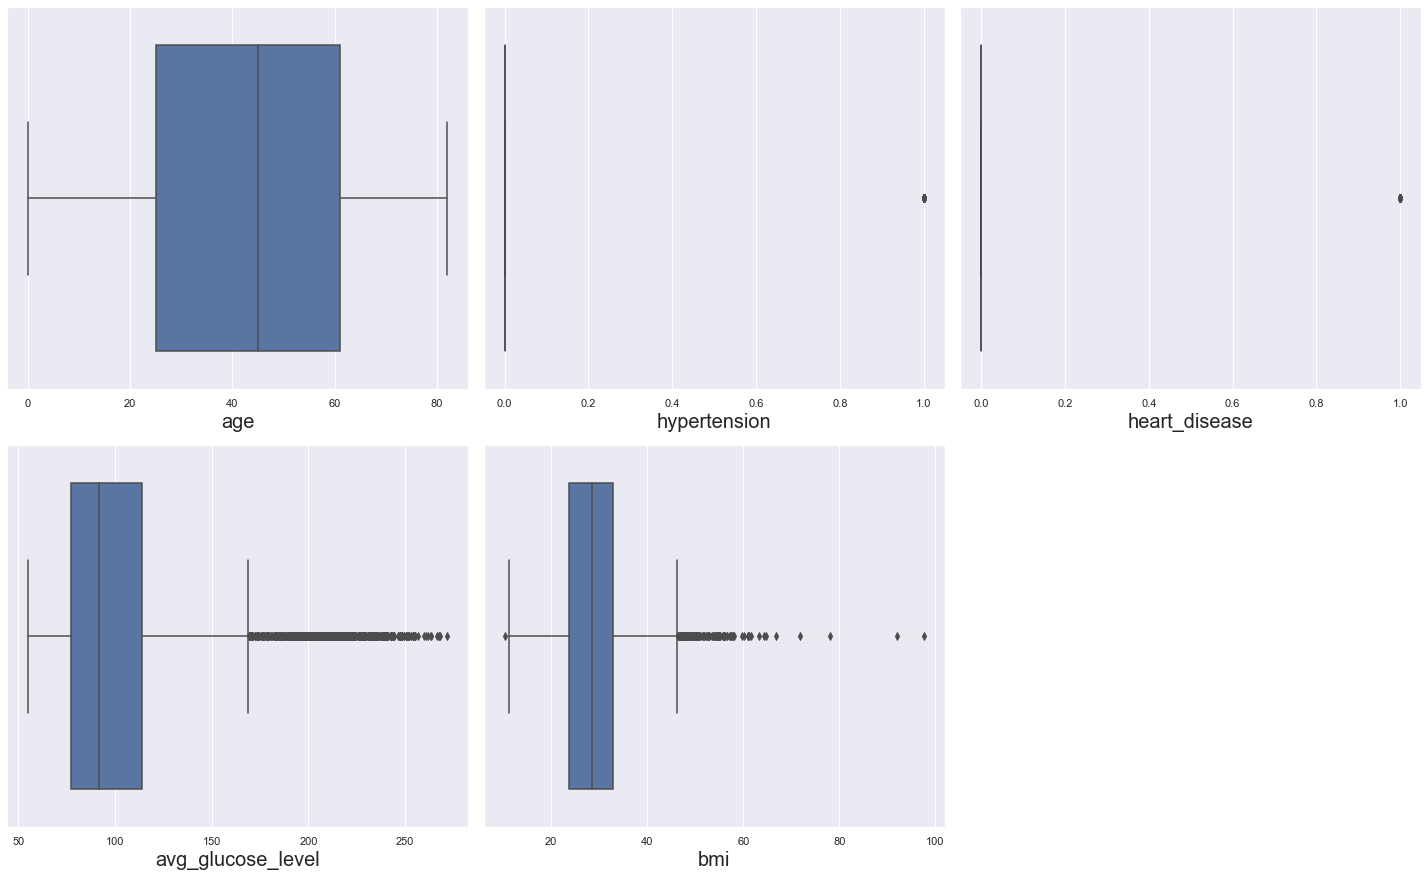

In [51]:
# lets see outliers
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [52]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [53]:
df.loc[detect_outliers(df,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

id  gender   age  hypertension  heart_disease ever_married  \
0     9046    Male  67.0             0              1          Yes   
4     1665  Female  79.0             1              0          Yes   
13    8213    Male  78.0             0              1          Yes   
14    5317  Female  79.0             0              1          Yes   
16   56112    Male  64.0             0              1          Yes   
..     ...     ...   ...           ...            ...          ...   
6    53882    Male  74.0             1              1          Yes   
35     712  Female  82.0             1              1           No   
143  37651  Female  69.0             1              1           No   
171  60739  Female  79.0             1              1           No   
184  28378    Male  61.0             1              1          Yes   

         work_type Residence_type  avg_glucose_level        bmi  \
0          Private          Urban             228.69  36.600000   
4    Self-employed          Rural             174.12  24.000000   
13         Private          Urban             219.84  28.893237   
14         Private          Urban             214.09  28.200000   
16         Private          Urban             191.61  37.500000   
..             ...            ...                ...        ...   
6          Private          Rural              70.09  27.400000   
35         Private          Rural              84.03  26.500000   
143  Self-employed          Urban              72.17  36.800000   
171  Self-employed          Rural              60.94  28.893237   
184        Private          Urban             112.24  37.400000   

      smoking_status  stroke  
0    formerly smoked       1  
4       never smoked       1  
13           Unknown       1  
14      never smoked       1  
16            smokes       1  
..               ...     ...  
6       never smoked       1  
35   formerly smoked       1  
143     never smoked       1  
171     never smoked       1  
184           smokes       1  

[87 rows x 12 columns]

In [54]:
# drop outliers
df = df.drop(detect_outliers(df,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)

In [55]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0     51676  Female  61.0             0              0          Yes   
1     31112    Male  80.0             0              1          Yes   
2     60182  Female  49.0             0              0          Yes   
3     56669    Male  81.0             0              0          Yes   
4     10434  Female  69.0             0              0           No   
...     ...     ...   ...           ...            ...          ...   
5018  18234  Female  80.0             1              0          Yes   
5019  44873  Female  81.0             0              0          Yes   
5020  19723  Female  35.0             0              0          Yes   
5021  37544    Male  51.0             0              0          Yes   
5022  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0     Self-employed          Rural             202.21  28.893237   
1           Private          Rural             105.92  32.500000   
2           Private          Urban             171.23  34.400000   
3           Private          Urban             186.21  29.000000   
4           Private          Urban              94.39  22.800000   
...             ...            ...                ...        ...   
5018        Private          Urban              83.75  28.893237   
5019  Self-employed          Urban             125.20  40.000000   
5020  Self-employed          Rural              82.99  30.600000   
5021        Private          Rural             166.29  25.600000   
5022       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
0        never smoked       1  
1        never smoked       1  
2              smokes       1  
3     formerly smoked       1  
4        never smoked       1  
...               ...     ...  
5018     never smoked       0  
5019     never smoked       0  
5020     never smoked       0  
5021  formerly smoked       0  
5022          Unknown       0  

[5023 rows x 12 columns]

In [56]:
# pandas profiling
from pandas_profiling import ProfileReport

In [57]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  51676  Female  61.0             0              0          Yes   
1  31112    Male  80.0             0              1          Yes   
2  60182  Female  49.0             0              0          Yes   
3  56669    Male  81.0             0              0          Yes   
4  10434  Female  69.0             0              0           No   

       work_type Residence_type  avg_glucose_level        bmi  \
0  Self-employed          Rural             202.21  28.893237   
1        Private          Rural             105.92  32.500000   
2        Private          Urban             171.23  34.400000   
3        Private          Urban             186.21  29.000000   
4        Private          Urban              94.39  22.800000   

    smoking_status  stroke  
0     never smoked       1  
1     never smoked       1  
2           smokes       1  
3  formerly smoked       1  
4     never smoked       1

In [58]:
profile = ProfileReport(df)
profile.to_file(output_file = "stroke.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Handle categorical columns

In [59]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  51676  Female  61.0             0              0          Yes   
1  31112    Male  80.0             0              1          Yes   
2  60182  Female  49.0             0              0          Yes   
3  56669    Male  81.0             0              0          Yes   
4  10434  Female  69.0             0              0           No   

       work_type Residence_type  avg_glucose_level        bmi  \
0  Self-employed          Rural             202.21  28.893237   
1        Private          Rural             105.92  32.500000   
2        Private          Urban             171.23  34.400000   
3        Private          Urban             186.21  29.000000   
4        Private          Urban              94.39  22.800000   

    smoking_status  stroke  
0     never smoked       1  
1     never smoked       1  
2           smokes       1  
3  formerly smoked       1  
4     never smoked       1

In [60]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1853
Unknown            1534
formerly smoked     861
smokes              775
Name: count, dtype: int64

In [61]:
df.smoking_status.unique()

array(['never smoked', 'smokes', 'formerly smoked', 'Unknown'],
      dtype=object)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5023 non-null   int64  
 1   gender             5023 non-null   object 
 2   age                5023 non-null   float64
 3   hypertension       5023 non-null   int64  
 4   heart_disease      5023 non-null   int64  
 5   ever_married       5023 non-null   object 
 6   work_type          5023 non-null   object 
 7   Residence_type     5023 non-null   object 
 8   avg_glucose_level  5023 non-null   float64
 9   bmi                5023 non-null   float64
 10  smoking_status     5023 non-null   object 
 11  stroke             5023 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 471.0+ KB


In [63]:
df.gender.value_counts()

gender
Female    2951
Male      2071
Other        1
Name: count, dtype: int64

## One Hot Encoding

In [64]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

gender_Male  gender_Other
0        False         False
1         True         False
2        False         False
3         True         False
4        False         False

In [65]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

ever_married_Yes
0              True
1              True
2              True
3              True
4             False

In [66]:
df.work_type.value_counts()

work_type
Private          2872
Self-employed     795
children          687
Govt_job          647
Never_worked       22
Name: count, dtype: int64

In [67]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False              False                     True   
1                   False               True                    False   
2                   False               True                    False   
3                   False               True                    False   
4                   False               True                    False   

   work_type_children  
0               False  
1               False  
2               False  
3               False  
4               False

In [68]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

Residence_type_Urban
0                 False
1                 False
2                  True
3                  True
4                  True

In [69]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                         True   
1                           False                         True   
2                           False                        False   
3                            True                        False   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                   True  
3                  False  
4                  False

In [70]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  51676  Female  61.0             0              0          Yes   
1  31112    Male  80.0             0              1          Yes   
2  60182  Female  49.0             0              0          Yes   
3  56669    Male  81.0             0              0          Yes   
4  10434  Female  69.0             0              0           No   

       work_type Residence_type  avg_glucose_level        bmi  ...  \
0  Self-employed          Rural             202.21  28.893237  ...   
1        Private          Rural             105.92  32.500000  ...   
2        Private          Urban             171.23  34.400000  ...   
3        Private          Urban             186.21  29.000000  ...   
4        Private          Urban              94.39  22.800000  ...   

  gender_Other  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0        False              True                   False              False   
1        False              True                   False               True   
2        False              True                   False               True   
3        False              True                   False               True   
4        False             False                   False               True   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                     True               False                 False   
1                    False               False                 False   
2                    False               False                  True   
3                    False               False                  True   
4                    False               False                  True   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                         True   
1                           False                         True   
2                           False                        False   
3                            True                        False   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                   True  
3                  False  
4                  False  

[5 rows x 23 columns]

In [71]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0  51676  61.0             0              0             202.21  28.893237   
1  31112  80.0             0              1             105.92  32.500000   
2  60182  49.0             0              0             171.23  34.400000   
3  56669  81.0             0              0             186.21  29.000000   
4  10434  69.0             0              0              94.39  22.800000   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1        False         False              True   
1       1         True         False              True   
2       1        False         False              True   
3       1         True         False              True   
4       1        False         False             False   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False              False                     True   
1                   False               True                    False   
2                   False               True                    False   
3                   False               True                    False   
4                   False               True                    False   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0               False                 False                           False   
1               False                 False                           False   
2               False                  True                           False   
3               False                  True                            True   
4               False                  True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                         True                  False  
1                         True                  False  
2                        False                   True  
3                        False                  False  
4                         True                  False

In [72]:
data = data.drop(columns="id" , axis=1)
data.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  61.0             0              0             202.21  28.893237       1   
1  80.0             0              1             105.92  32.500000       1   
2  49.0             0              0             171.23  34.400000       1   
3  81.0             0              0             186.21  29.000000       1   
4  69.0             0              0              94.39  22.800000       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0        False         False              True                   False   
1         True         False              True                   False   
2        False         False              True                   False   
3         True         False              True                   False   
4        False         False             False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0              False                     True               False   
1               True                    False               False   
2               True                    False               False   
3               True                    False               False   
4               True                    False               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                 False                           False   
1                 False                           False   
2                  True                           False   
3                  True                            True   
4                  True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                         True                  False  
1                         True                  False  
2                        False                   True  
3                        False                  False  
4                         True                  False

In [73]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [74]:
data.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  61.0             0              0             202.21  28.893237       1   
1  80.0             0              1             105.92  32.500000       1   
2  49.0             0              0             171.23  34.400000       1   
3  81.0             0              0             186.21  29.000000       1   
4  69.0             0              0              94.39  22.800000       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0        False         False              True                   False   
1         True         False              True                   False   
2        False         False              True                   False   
3         True         False              True                   False   
4        False         False             False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0              False                     True               False   
1               True                    False               False   
2               True                    False               False   
3               True                    False               False   
4               True                    False               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                 False                           False   
1                 False                           False   
2                  True                           False   
3                  True                            True   
4                  True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                         True                  False  
1                         True                  False  
2                        False                   True  
3                        False                  False  
4                         True                  False

In [75]:
data.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5023.000000   5023.000000    5023.000000        5023.000000   
mean     42.786184      0.085805       0.044197         104.416474   
std      22.520016      0.280104       0.205552          43.422387   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          76.985000   
50%      44.000000      0.000000       0.000000          91.350000   
75%      60.000000      0.000000       0.000000         112.465000   
max      82.000000      1.000000       1.000000         267.760000   

               bmi       stroke  
count  5023.000000  5023.000000  
mean     28.795800     0.038821  
std       7.623248     0.193188  
min      10.300000     0.000000  
25%      23.700000     0.000000  
50%      28.300000     0.000000  
75%      32.700000     0.000000  
max      97.600000     1.000000

# Correalation between features and target

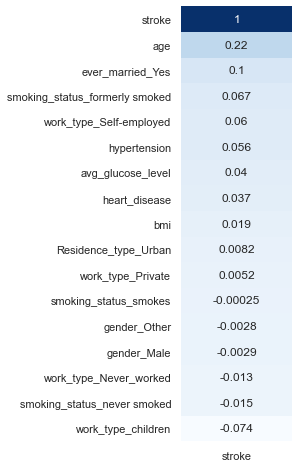

In [76]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

### Split dataset into train and test

In [77]:
data.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  61.0             0              0             202.21  28.893237       1   
1  80.0             0              1             105.92  32.500000       1   
2  49.0             0              0             171.23  34.400000       1   
3  81.0             0              0             186.21  29.000000       1   
4  69.0             0              0              94.39  22.800000       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0        False         False              True                   False   
1         True         False              True                   False   
2        False         False              True                   False   
3         True         False              True                   False   
4        False         False             False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0              False                     True               False   
1               True                    False               False   
2               True                    False               False   
3               True                    False               False   
4               True                    False               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                 False                           False   
1                 False                           False   
2                  True                           False   
3                  True                            True   
4                  True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                         True                  False  
1                         True                  False  
2                        False                   True  
3                        False                  False  
4                         True                  False

In [78]:
x = data.drop("stroke", axis=1)
x.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  \
0  61.0             0              0             202.21  28.893237   
1  80.0             0              1             105.92  32.500000   
2  49.0             0              0             171.23  34.400000   
3  81.0             0              0             186.21  29.000000   
4  69.0             0              0              94.39  22.800000   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0        False         False              True                   False   
1         True         False              True                   False   
2        False         False              True                   False   
3         True         False              True                   False   
4        False         False             False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0              False                     True               False   
1               True                    False               False   
2               True                    False               False   
3               True                    False               False   
4               True                    False               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                 False                           False   
1                 False                           False   
2                  True                           False   
3                  True                            True   
4                  True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                         True                  False  
1                         True                  False  
2                        False                   True  
3                        False                  False  
4                         True                  False

In [79]:
y = data[['stroke']]
y.head()

stroke
0       1
1       1
2       1
3       1
4       1

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [81]:
x

array([[ 0.80886398, -0.30636397, -0.21503573, ..., -0.4548315 ,
         1.30795235, -0.42712855],
       [ 1.65264188, -0.30636397,  4.65038989, ..., -0.4548315 ,
         1.30795235, -0.42712855],
       [ 0.27595163, -0.30636397, -0.21503573, ..., -0.4548315 ,
        -0.76455385,  2.34121557],
       ...,
       [-0.34577945, -0.30636397, -0.21503573, ..., -0.4548315 ,
         1.30795235, -0.42712855],
       [ 0.36477035, -0.30636397, -0.21503573, ...,  2.1986164 ,
        -0.76455385, -0.42712855],
       [ 0.05390481, -0.30636397, -0.21503573, ..., -0.4548315 ,
        -0.76455385, -0.42712855]])

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [83]:
x_train

array([[-1.41160416, -0.30636397, -0.21503573, ..., -0.4548315 ,
        -0.76455385, -0.42712855],
       [ 0.40917972, -0.30636397, -0.21503573, ..., -0.4548315 ,
        -0.76455385,  2.34121557],
       [ 0.72004526, -0.30636397, -0.21503573, ..., -0.4548315 ,
         1.30795235, -0.42712855],
       ...,
       [ 1.11972952, -0.30636397, -0.21503573, ..., -0.4548315 ,
        -0.76455385,  2.34121557],
       [-1.81128842, -0.30636397, -0.21503573, ..., -0.4548315 ,
        -0.76455385, -0.42712855],
       [ 0.63122653, -0.30636397, -0.21503573, ...,  2.1986164 ,
        -0.76455385, -0.42712855]])

### Model training

In [84]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=1)
decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [85]:
# accuracy
decision.score(x_test, y_test)

0.9258142340168878

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [87]:
# accuracy
rf.score(x_test, y_test)

0.9595898673100121

In [88]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [89]:
model.score(x_test,y_test)

0.9595898673100121

In [90]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(x_train,y_train)

KNeighborsClassifier()

In [91]:
kc.score(x_test,y_test)

0.9589867310012062

In [92]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [93]:
lg.score(x_test,y_test)

0.9595898673100121

## HyperParameter Tuning

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.

In [94]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.961 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.961 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.961 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.961 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.961 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.961 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.963 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.923 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.938 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.930 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.958 total time=   0.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [95]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [96]:
from sklearn.svm import SVC

# Using best parameters from grid search
best_params = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

# Creating SVC model with best parameters
model = SVC(**best_params)

# Fitting the model to the training data
model.fit(x_train, y_train)


SVC(C=100, gamma=0.01)

In [97]:
model.score(x_test,y_test)

0.9595898673100121

In [98]:
prep = model.predict(x_test)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prep))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1591
           1       0.00      0.00      0.00        67

    accuracy                           0.96      1658
   macro avg       0.48      0.50      0.49      1658
weighted avg       0.92      0.96      0.94      1658



# Saving the model

In [100]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)

### Thank You